## **Ülesseadmine**

In [1]:
!mkdir photos
!mkdir ../data/

mkdir: photos: File exists
mkdir: ../data/: File exists


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from datapointloss.functions import brier_curve, curve_areas, loss_bins, brier, cross_entropy, default, Feature

In [3]:
!curl -o ../data/german.data https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79793  100 79793    0     0  19048      0  0:00:04  0:00:04 --:--:-- 20093


In [4]:
path = '../data/german.data'

## **Andmed**

In [5]:
data = pd.read_csv(path, sep=' ', header=None, names=[str(i) for i in range(1, 22)])

In [6]:
data = pd.get_dummies(data)
data

,2,5,8,11,13,16,18,21,1_A11,1_A12,...,15_A152,15_A153,17_A171,17_A172,17_A173,17_A174,19_A191,19_A192,20_A201,20_A202
0,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,2,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,2,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
996,30,3857,4,4,40,1,1,1,1,0,...,1,0,0,0,0,1,0,1,1,0
997,12,804,4,4,38,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0
998,45,1845,4,4,23,1,1,2,1,0,...,0,1,0,0,1,0,0,1,1,0


In [7]:
X = data.drop(columns=['21'])
y = data['21']

In [8]:
y = y.replace([1, 2], [0, 1])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Tunnuste loetelu

In [10]:
feature_ids = [
{'1': 'Status of existing checking account',
'A11': '... < 0 DM',
'A12' : '0 <= ... < 200 DM',
'A13' : '... >= 200 DM',
'A14' : 'no checking account'
},
{'2': 'Duration in month'},
{'3': 'Credit history',
'A30' : 'no credits taken/ all credits paid back duly',
'A31' : 'all credits at this bank paid back duly',
'A32' : 'existing credits paid back duly till now',
'A33' : 'delay in paying off in the past',
'A34' : 'critical account/ other credits existing (not at this bank)'
},
{'4': 'Purpose',
'A40' : 'car (new)',
'A41' : 'car (used)',
'A42' : 'furniture/equipment',
'A43' : 'radio/television',
'A44' : 'domestic appliances',
'A45' : 'repairs',
'A46' : 'education',
#'A47' : '(vacation - does not exist?)',
'A48' : 'retraining',
'A49' : 'business',
'A410' : 'others'
},
{'5': 'Credit amount'},
{'6': 'Savings account/bonds',
'A61' : '... < 100 DM',
'A62' : '100 <= ... < 500 DM',
'A63' : '500 <= ... < 1000 DM',
'A64' : '.. >= 1000 DM',
'A65' : 'unknown/ no savings account'
},
{'7': 'Present employment since',
'A71' : 'unemployed',
'A72' : '... < 1 year',
'A73' : '1 <= ... < 4 years',
'A74' : '4 <= ... < 7 years',
'A75' : '.. >= 7 years'
},
{'8': 'Installment rate in percentage of disposable income'
},
{'9': 'Personal status and sex',
'A91' : 'male : divorced/separated',
'A92' : 'female : divorced/separated/married',
'A93' : 'male : single',
'A94' : 'male : married/widowed',
#'A95' : 'female : single'
},
{'10': 'Other debtors / guarantors',
'A101' : 'none',
'A102' : 'co-applicant',
'A103' : 'guarantor',
},
{'11': 'Present residence since'},
{'12': 'Property',
'A121' : 'real estate',
'A122' : 'if not A121 : building society savings agreement/ life insurance',
'A123' : 'if not A121/A122 : car or other, not in attribute 6',
'A124' : 'unknown / no property'
},
{'13': 'Age in years'},
{'14': 'Other installment plans',
'A141' : 'bank',
'A142' : 'stores',
'A143' : 'none'
},
{'15': 'Housing',
'A151' : 'rent',
'A152' : 'own',
'A153' : 'for free'
},
{'16': 'Number of existing credits at this bank'},
{'17': 'Job',
'A171' : 'unemployed/ unskilled - non-resident',
'A172' : 'unskilled - resident',
'A173' : 'skilled employee / official',
'A174' : 'management/ self-employed/highly qualified employee/ officer'
},
{'18': 'Number of people being liable to provide maintenance for'},
{'19': 'Telephone',
'A191' : 'none',
'A192' : 'yes, registered under the customers name'
},
{'20': 'foreign worker',
'A201' : 'yes',
'A202' : 'no'
}]


# **Mudelid**

In [11]:
def cost_accuracy(model, X_test, y_test):  
    c = 1 / 6
    correct = 0
    n = len(X_test)
    pos_prob = model.predict_proba(X_test)[:,1]
    for i in range(n):
        pred = 0
        if pos_prob[i] > c:
            pred = 1
        else: 
            pred = 0
        if y_test[i] == pred:
            correct += 1
    return correct / n

In [12]:
rfc = RandomForestClassifier(random_state=40)
rfc.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [13]:
accuracy_score(y_test, rfc.predict(X_test))

0.7633333333333333

In [14]:
accuracy_score(y_test, nb.predict(X_test))

0.7366666666666667

## **Brier'i kõverad**

In [15]:
x=np.linspace(0.000,1.000,1001).tolist()
pos_probs_rfc = rfc.predict_proba(X_test)[:,1]
pos_probs_nb = nb.predict_proba(X_test)[:,1]

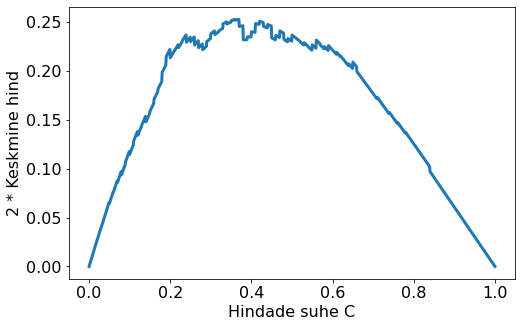

In [16]:
y_rfc = brier_curve(np.array(y_test), pos_probs_rfc, w=brier)

plt.figure(figsize=(8, 5))

plt.plot(x, y_rfc, label='whole curve', linewidth=3)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Hindade suhe C', fontsize=16)
plt.ylabel('2 * Keskmine hind',  fontsize=16)

plt.savefig('photos/credit_brier_curve.png')

## **Ristentroopia kõverad**

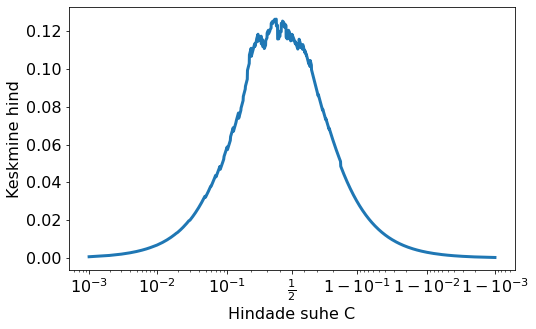

In [17]:
## Plot figure 
plt.figure(figsize=(8,5))

plt.gcf().subplots_adjust(bottom=0.15)

## Plot curve for all the data.
y = brier_curve(y_test.to_list(), pos_probs_rfc)
plt.plot(x, y, label='whole curve', linewidth=3)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xscale('logit')

plt.xlabel('Hindade suhe C', fontsize=16)
plt.ylabel('Keskmine hind',  fontsize=16)

plt.savefig('photos/credit_crossentropy_curve.png')

## Brier'i kõver

### Positiivsed andmepunktid

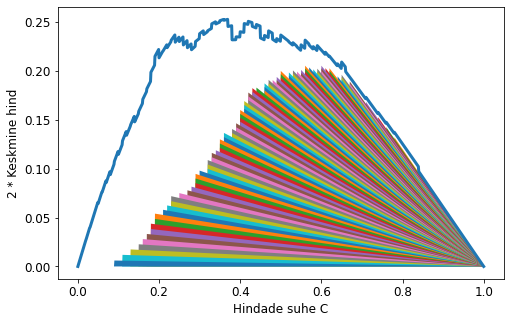

In [18]:
y_curve = brier_curve(np.array(y_test), pos_probs_rfc, w=brier)

plt.figure(figsize=(8, 5))

plt.plot(x, y_curve, linewidth=3)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Hindade suhe C', fontsize=12)
plt.ylabel('2 * Keskmine hind',  fontsize=12)

curve_areas(X_test, y_test, pos_probs_rfc, targets=[1], w=brier)
plt.savefig('photos/credit_pos_areas_brier_curve.png')

### Negatiivsed andmepunktid

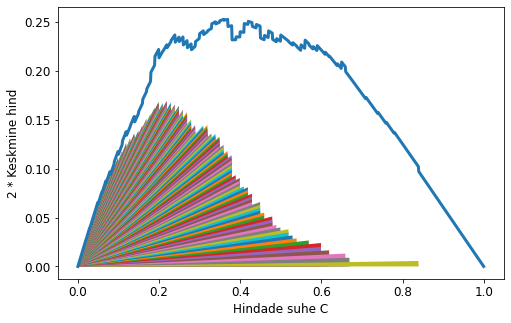

In [19]:
y_curve = brier_curve(np.array(y_test), pos_probs_rfc, w=brier)

plt.figure(figsize=(8, 5))

plt.plot(x, y_curve, linewidth=3)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Hindade suhe C', fontsize=12)
plt.ylabel('2 * Keskmine hind',  fontsize=12)

curve_areas(X_test, y_test, pos_probs_rfc, targets=[0], w=brier)
plt.savefig('photos/credit_neg_areas_brier_curve.png')

## Ristentroopia kõver

### Positiivsed andmepunktid

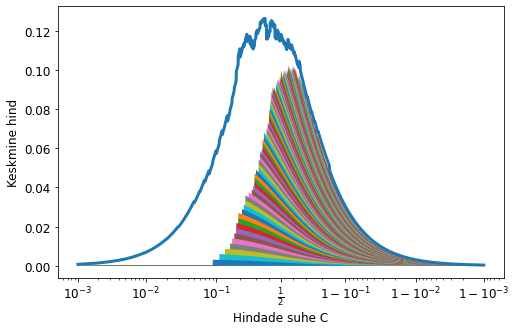

In [20]:
y_curve = brier_curve(y_test.to_list(), pos_probs_rfc)

plt.figure(figsize=(8, 5))

plt.plot(x, y_curve, linewidth=3)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Hindade suhe C', fontsize=12)
plt.ylabel('Keskmine hind',  fontsize=12)

plt.xscale('logit')

curve_areas(X_test, y_test, pos_probs_rfc, targets=[1])
plt.savefig('photos/credit_pos_areas_crossentropy_curve.png')

### Negatiivsed andmepunktid

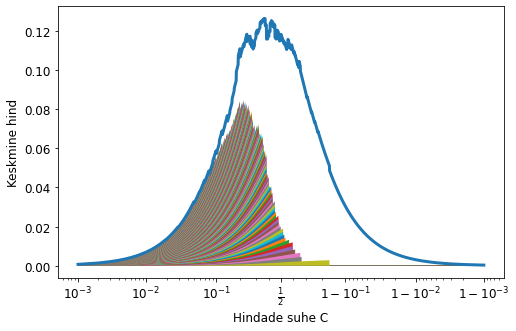

In [21]:
y_curve = brier_curve(np.array(y_test), pos_probs_rfc)

plt.figure(figsize=(8, 5))

plt.plot(x, y_curve, linewidth=3)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Hindade suhe C', fontsize=12)
plt.ylabel('Keskmine hind',  fontsize=12)

plt.xscale('logit')

curve_areas(X_test, y_test, pos_probs_rfc, targets=[0])
plt.savefig('photos/credit_neg_areas_crossentropy_curve.png')

## **Brier'i skoori tulpdiagramm**

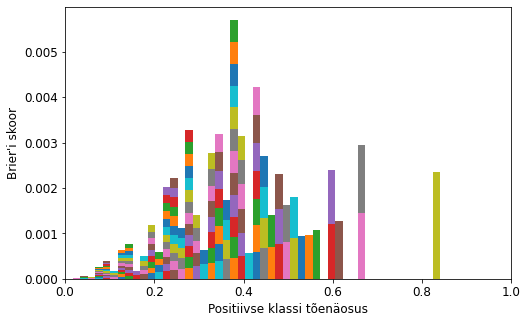

In [22]:
plt.figure(figsize=(8, 5))

loss_bins(y_test, pos_probs_rfc, w=brier, bins=50)

plt.xlabel('Positiivse klassi tõenäosus', fontsize=12)
plt.ylabel('Brier\'i skoor', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('photos/credit_neg_loss_bins.png')

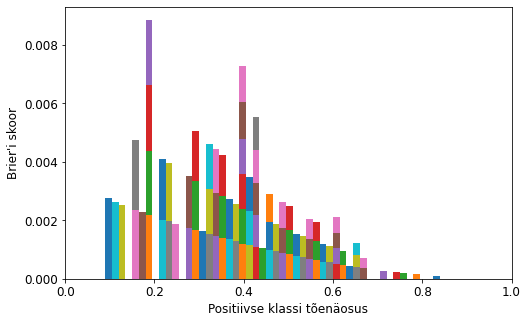

In [23]:
plt.figure(figsize=(8, 5))

loss_bins(y_test, pos_probs_rfc, w=brier, bins=50, target=1)

plt.xlabel('Positiivse klassi tõenäosus', fontsize=12)
plt.ylabel('Brier\'i skoor', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('photos/credit_pos_loss_bins.png')

## **Klassifikaatorite võrdlemine**

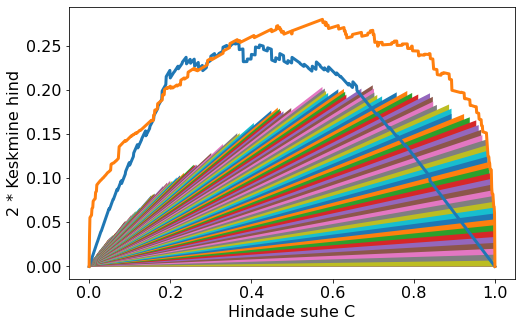

In [24]:
y_rfc = brier_curve(y_test.to_list(), pos_probs_rfc, w=brier)
y_nb = brier_curve(y_test.to_list(), pos_probs_nb, w=brier)
#y_lgr = brier_curve(y_test.to_list(), pos_probs_lgr, w=brier)

plt.figure(figsize=(8, 5))

plt.plot(x, y_rfc, label='whole curve', linewidth=3)
plt.plot(x, y_nb, label='whole curve', linewidth=3)
#plt.plot(x, y_lgr, label='whole curve', linewidth=3)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Hindade suhe C', fontsize=16)
plt.ylabel('2 * Keskmine hind',  fontsize=16)

curve_areas(X_test, y_test, pos_probs_nb, targets=[0], w=brier)

plt.savefig('photos/credit_brier_curve_comparison.png')

## **Andmepunktide tunnuste eraldamine**

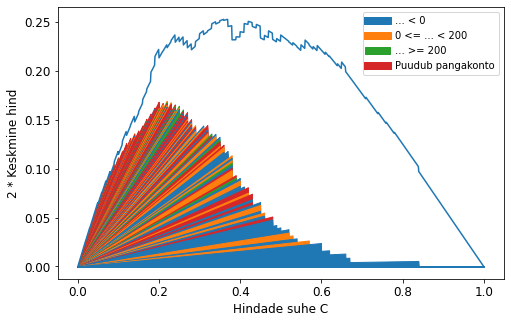

In [25]:
y_curve = brier_curve(y_test.to_list(), pos_probs_rfc, w=brier)
plt.figure(figsize=(8, 5))

plt.plot(x, y_curve)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Hindade suhe C', fontsize=12)
plt.ylabel('2 * Keskmine hind',  fontsize=12)

values = {'1_A11': '... < 0',
'1_A12' : '0 <= ... < 200',
'1_A13' : '... >= 200',
'1_A14' : 'Puudub pangakonto'}

feature = Feature(values)
curve_areas(X_test, y_test, pos_probs_rfc, targets=[0], feature=feature, w=brier)

plt.savefig('photos/credit_brier_curve_features_0.png')

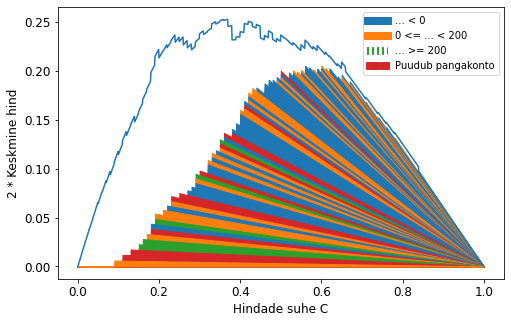

In [26]:
y_curve = brier_curve(y_test.to_list(), pos_probs_rfc, w=brier)
plt.figure(figsize=(8, 5))

plt.plot(x, y_curve)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Hindade suhe C', fontsize=12)
plt.ylabel('2 * Keskmine hind',  fontsize=12)

curve_areas(X_test, y_test, pos_probs_rfc, targets=[1], feature=feature, w=brier)

plt.savefig('photos/credit_brier_curve_features_1.png')

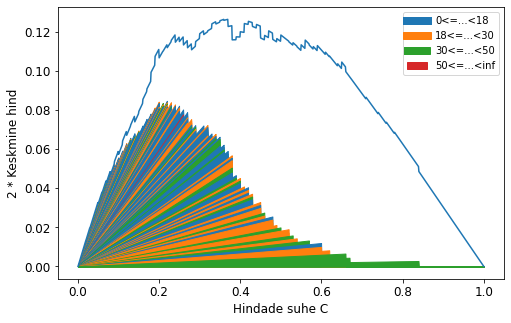

In [28]:
y_curve = brier_curve(y_test.to_list(), pos_probs_rfc)
plt.figure(figsize=(8, 5))

plt.plot(x, y_curve)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Hindade suhe C', fontsize=12)
plt.ylabel('2 * Keskmine hind',  fontsize=12)

values = {'2': [0, 18, 30, 50, float('inf')]}

feature = Feature(values)

curve_areas(X_test, y_test, pos_probs_rfc, targets=[0], feature=feature)

plt.savefig('photos/credit_brier_curve_features_2.png')